**UNIVERSIDAD AUTÓNOMA DE NUEVO LEÓN**

 FACULTAD DE CIENCIAS FÍSICO MATEMÁTICAS


---


MAESTRÍA EN CIENCIAS DE DATOS

PROCESAMIENTO Y CLASIFICACIÓN DE DATOS

---


*1819111 LESLYE MARISOL HERNANDEZ BOLAÑOS*

**Objetivo:**


Realizar un análisis estadístico sobre algún origen de datos textual (libros, publicaciones en redes sociales, entradas de blog, discursos políticos...) sobre dos o más fuentes de uno o más autores.

Analizar estadística descriptiva básica, frecuencias, distribuciones de palabras, n-gramas, uso de signos de puntuación, emojis...

Comparar las diversas fuentes y aventurar conclusiones a partir de los hallazgos en un reporte científico (de preferencia hecho en Latex; si no en Markdown como readme.md del repositorio).

Sube a tu repositorio el código utilizado en tu tarea y el reporte en PDF (y TEX si aplica) en una carpeta claramente identificada.




**Fuente de datos:** *Amazon Product Data*  

- **Descripción:** Ofrece una gran variedad de reseñas de productos en diferentes categorías, como libros, electrónicos, ropa, etc.
- **Enlace:** https://amazon-reviews-2023.github.io/
- **Enfoque:** Es ideal para recomendaciones colaborativas (basadas en reseñas).
- **Categoría:** All_Beauty


## Extracción

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os

#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.metrics.pairwise import cosine_similarity
#from sklearn.model_selection import train_test_split
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.metrics import classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive')


# Path
path = "/content/drive/MyDrive/Leslye/Escuela/MCD/Datos Masivos/Proyecto/ejem2/"
review="All_Beauty.jsonl.gz"
features="meta_All_Beauty.jsonl.gz"




Mounted at /content/drive


In [5]:
df_review = pd.read_json(path+review, compression='gzip', lines=True)
df_meta=pd.read_json(path+features, compression='gzip', lines=True)

In [4]:
# Configurar pandas para mostrar el texto completo en las columnas
pd.set_option('display.max_colwidth', None)

# Datos para las reseñas de los usuarios (User Reviews)
user_reviews = [
    {"Variable": "rating", "Tipo": "float", "Descripción": "Calificación del producto (de 1.0 a 5.0)."},
    {"Variable": "title", "Tipo": "str", "Descripción": "Título de la reseña del usuario."},
    {"Variable": "text", "Tipo": "str", "Descripción": "Texto del cuerpo de la reseña del usuario."},
    {"Variable": "images", "Tipo": "list", "Descripción": "Imágenes publicadas por los usuarios, disponibles en diferentes tamaños (pequeño, mediano, grande)."},
    {"Variable": "asin", "Tipo": "str", "Descripción": "ID del producto."},
    {"Variable": "parent_asin", "Tipo": "str", "Descripción": "ID principal del producto, que agrupa productos similares en diferentes variantes."},
    {"Variable": "user_id", "Tipo": "str", "Descripción": "ID del usuario que realizó la reseña."},
    {"Variable": "timestamp", "Tipo": "int", "Descripción": "Marca de tiempo de la reseña (en formato Unix)."},
    {"Variable": "verified_purchase", "Tipo": "bool", "Descripción": "Indica si la compra fue verificada."},
    {"Variable": "helpful_vote", "Tipo": "int", "Descripción": "Número de votos útiles que recibió la reseña."}
]

# Crear DataFrames para cada tabla
df_user_reviews = pd.DataFrame(user_reviews)

# Mostrar las tablas
print("\n Tabla: User Reviews \n")
df_user_reviews


 Tabla: User Reviews 



,Variable,Tipo,Descripción
0,rating,float,Calificación del producto (de 1.0 a 5.0).
1,title,str,Título de la reseña del usuario.
2,text,str,Texto del cuerpo de la reseña del usuario.
3,images,list,"Imágenes publicadas por los usuarios, disponibles en diferentes tamaños (pequeño, mediano, grande)."
4,asin,str,ID del producto.
5,parent_asin,str,"ID principal del producto, que agrupa productos similares en diferentes variantes."
6,user_id,str,ID del usuario que realizó la reseña.
7,timestamp,int,Marca de tiempo de la reseña (en formato Unix).
8,verified_purchase,bool,Indica si la compra fue verificada.
9,helpful_vote,int,Número de votos útiles que recibió la reseña.


In [6]:
# Datos para los metadatos del producto (Item Metadata)

item_metadata = [
    {"Variable": "main_category", "Tipo": "str", "Descripción": "Categoría principal (es decir, el dominio) del producto."},
    {"Variable": "title", "Tipo": "str", "Descripción": "Nombre del producto."},
    {"Variable": "average_rating", "Tipo": "float", "Descripción": "Calificación promedio del producto mostrada en la página del producto."},
    {"Variable": "rating_number", "Tipo": "int", "Descripción": "Número total de calificaciones que recibió el producto."},
    {"Variable": "features", "Tipo": "list", "Descripción": "Características del producto en formato de viñetas."},
    {"Variable": "description", "Tipo": "list", "Descripción": "Descripción del producto."},
    {"Variable": "price", "Tipo": "float", "Descripción": "Precio en dólares estadounidenses (al momento de la recolección de datos)."},
    {"Variable": "images", "Tipo": "list", "Descripción": "Imágenes del producto, en diferentes tamaños (miniatura, grande, alta resolución)."},
    {"Variable": "videos", "Tipo": "list", "Descripción": "Videos del producto, incluyendo título y URL."},
    {"Variable": "store", "Tipo": "str", "Descripción": "Nombre de la tienda que vende el producto."},
    {"Variable": "categories", "Tipo": "list", "Descripción": "Categorías jerárquicas del producto."},
    {"Variable": "details", "Tipo": "dict", "Descripción": "Detalles del producto, incluyendo materiales, marca, tamaño, etc."},
    {"Variable": "parent_asin", "Tipo": "str", "Descripción": "ID principal del producto."},
    {"Variable": "bought_together", "Tipo": "list", "Descripción": "Productos recomendados que se suelen comprar juntos."}
]

# Crear DataFrames para cada tabla
df_item_metadata = pd.DataFrame(item_metadata)

# Mostrar las tablas
print("Tabla: Item Metadata")
df_item_metadata

Tabla: Item Metadata


,Variable,Tipo,Descripción
0,main_category,str,"Categoría principal (es decir, el dominio) del producto."
1,title,str,Nombre del producto.
2,average_rating,float,Calificación promedio del producto mostrada en la página del producto.
3,rating_number,int,Número total de calificaciones que recibió el producto.
4,features,list,Características del producto en formato de viñetas.
5,description,list,Descripción del producto.
6,price,float,Precio en dólares estadounidenses (al momento de la recolección de datos).
7,images,list,"Imágenes del producto, en diferentes tamaños (miniatura, grande, alta resolución)."
8,videos,list,"Videos del producto, incluyendo título y URL."
9,store,str,Nombre de la tienda que vende el producto.


In [7]:

# Visualiza las primeras filas
df_review.head()


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Such a lovely scent but not overpowering.,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!",[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was described but I was hoping it would be light)",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True


# 1. Análisis exploratorio de los datos.


Este dataset contiene las reseñas de productos de belleza de Amazon, y en particular, usaremos los campos *user_id* (ID del usuario), *asin* (ID del producto) y *rating* (calificación).

In [8]:
df_review.shape

(701528, 10)

In [9]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             701528 non-null  int64         
 1   title              701528 non-null  object        
 2   text               701528 non-null  object        
 3   images             701528 non-null  object        
 4   asin               701528 non-null  object        
 5   parent_asin        701528 non-null  object        
 6   user_id            701528 non-null  object        
 7   timestamp          701528 non-null  datetime64[ns]
 8   helpful_vote       701528 non-null  int64         
 9   verified_purchase  701528 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 48.8+ MB


In [10]:
df_review.describe()

,rating,timestamp,helpful_vote
count,701528.000000,701528,701528.000000
mean,3.960245,2019-04-09 03:31:48.115045888,0.923588
min,1.000000,2000-11-01 04:24:18,0.000000
25%,3.000000,2017-08-01 19:39:25.777499904,0.000000
50%,5.000000,2019-10-20 18:11:28.616499968,0.000000
75%,5.000000,2021-03-02 01:05:05.557999872,1.000000
max,5.000000,2023-09-09 00:39:36.666000,646.000000
std,1.494452,NaN,5.471391


In [11]:
df_meta.shape

(112590, 14)

In [12]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112590 entries, 0 to 112589
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   main_category    112590 non-null  object 
 1   title            112590 non-null  object 
 2   average_rating   112590 non-null  float64
 3   rating_number    112590 non-null  int64  
 4   features         112590 non-null  object 
 5   description      112590 non-null  object 
 6   price            17704 non-null   float64
 7   images           112590 non-null  object 
 8   videos           112590 non-null  object 
 9   store            101259 non-null  object 
 10  categories       112590 non-null  object 
 11  details          112590 non-null  object 
 12  parent_asin      112590 non-null  object 
 13  bought_together  0 non-null       float64
dtypes: float64(3), int64(1), object(10)
memory usage: 12.0+ MB


In [13]:
df_meta.describe()

,average_rating,rating_number,price,bought_together
count,112590.000000,112590.000000,17704.00000,0.0
mean,3.883488,50.541345,27.25573,NaN
std,0.874384,310.992502,50.47202,NaN
min,1.000000,1.000000,0.01000,NaN
25%,3.400000,3.000000,9.99000,NaN
50%,4.000000,9.000000,16.99000,NaN
75%,4.500000,28.000000,29.90000,NaN
max,5.000000,30206.000000,2548.98000,NaN


## Identificar y limpiar valores nulos y duplicados

In [14]:
print(df_review.columns)

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')


In [ ]:
print(df_meta.columns)

Index(['main_category', 'title', 'average_rating', 'rating_number', 'features',
       'description', 'price', 'images', 'videos', 'store', 'categories',
       'details', 'parent_asin', 'bought_together'],
      dtype='object')


In [15]:

# Comprobar la cantidad de valores nulos en cada columna
print("\n Valores nulos por columna:")
print(df_review.isnull().sum())


# Eliminar filas con valores nulos en las columnas relevantes
df = df_review[['user_id', 'asin', 'rating', 'title', 'text']].dropna()


# Unir el título y la descripción del review
col1 = df['title']
col2 = df['text']
df['title_review']= col1 + ' ' + col2


# Verificar si hay duplicados
print("\n Número de filas duplicadas:", df.duplicated().sum())


# Eliminar duplicados, si existen
df = df.drop_duplicates()


# Renombrar columnas para mayor claridad
df.columns = ['user_id', 'product_id', 'rating', 'title', 'text', 'title_review']


# Mostrar las primeras filas después de la limpieza
print("\n Datos después de la limpieza:")
print(df.head())



 Valores nulos por columna:
rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64

 Número de filas duplicadas: 7276

 Datos después de la limpieza:
                        user_id  product_id  rating  \
0  AGKHLEW2SOWHNMFQIJGBECAF7INQ  B00YQ6X8EO       5   
1  AGKHLEW2SOWHNMFQIJGBECAF7INQ  B081TJ8YS3       4   
2  AE74DYR3QUGVPZJ3P7RFWBGIX7XQ  B07PNNCSP9       5   
3  AFQLNQNQYFWQZPJQZS6V3NZU4QBQ  B09JS339BZ       1   
4  AFQLNQNQYFWQZPJQZS6V3NZU4QBQ  B08BZ63GMJ       5   

                                       title  \
0  Such a lovely scent but not overpowering.   
1     Works great but smells a little weird.   
2                                       Yes!   
3                          Synthetic feeling   
4                                         A+   

                                         

In [16]:
characteristics=df_meta[[  'parent_asin', 'title']]
characteristics.columns = [ "product_id", "prod_description"]
characteristics.head()

,product_id,prod_description
0,B01CUPMQZE,"Howard LC0008 Leather Conditioner, 8-Ounce (4-Pack)"
1,B076WQZGPM,"Yes to Tomatoes Detoxifying Charcoal Cleanser (Pack of 2) with Charcoal Powder, Tomato Fruit Extract, and Gingko Biloba Leaf Extract, 5 fl. oz."
2,B000B658RI,Eye Patch Black Adult with Tie Band (6 Per Pack)
3,B088FKY3VD,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4D Imitation Eyebrow Tattoos, 4D Hair-like Authentic Eyebrows Waterproof Long Lasting for Woman & Man Makeup Tool"
4,B07NGFDN6G,Precision Plunger Bars for Cartridge Grips – 93mm – Bag of 10 Plungers


In [17]:
#Columna con la que trabajaremos es title_review + rating
df_trabajo=df[['product_id','title_review', 'rating', 'user_id']]
df_trabajo.tail()

#Unimos con la otra tabla para extraer la descripción del producto



# Mismo nombre para poder unirlo con el df de meta, en donde están todos los titulos
#df_trabajo.columns = ["product_id",'title_review', 'rating' ]
merged_df = pd.merge(characteristics, df_trabajo, on = 'product_id')


In [18]:
merged_df.tail()

,product_id,prod_description,title_review,rating,user_id
633688,B07RD3YSNR,"ELISHACOY Or.day Mild Sun Cream SPF50 PA++++ 50ml - Containing Pink Calamine Powder Oil & Sebum Control Sunblock Cream, Fresh and Light Finish with Stickiness, for Sensitive Skin",Make sure your skin is dry It was very creamy and moisturizing.,5,AF6B66ES5FAMVZUXUSVBLM5OLDGA
633689,B077D2Z5RF,"TOPREETY 24""120gr 3/4 Full Head clip in hair extensions 5 Clips Attached Hairpieces (Light burgundy red #118C)",love it love it,5,AFE5M2D5K2QZ7NVVIPXCPWULQ4DQ
633690,B07DLRYKQZ,"Pets Playmate Pet Grooming Glove,Gentle Deshedding Brush Glove,Efficient Pet Hair Remover Mitt,Perfect for Dog & Cat with Long & Short Fur,Pet Massage Cleaning Tool,A Efficient Glove A Comb",Brought me closer to my dog This is so convenient. I have a miniature schnauzer and this really helps with grooming.,5,AEYLLFTH5ISPC4U2UWUS3IHOT34Q
633691,B07HNP2NTF,[10Pack] Makeup Brushes Set Cosmetics Tools Kit Peacock Style - Premium Professional Beauty Face Eye Shadow Concealer Blending Brush - Gradient Fantasy Handles For Gift (Pink),Just for show So pretty. But not for professional looks just for sho,5,AGT64FFCPWQUNLORJR752KUCAT5A
633692,B00U3OB8PY,Xcoser Pretty Party Anna Wig Hair Tails Hair Style for Cosplay Accessories,Perfect It’s a nice wig ! Exactly what I needed for Halloween and not too thin.,5,AGLSJ6T2YR5XIZWVWISOKPBFYGOA


# Estadistica descriptiva

In [22]:
# Longitud de cada texto
merged_df['long'] = merged_df['title_review'].apply(len)

# Número de palabras
merged_df['total_palabras'] = merged_df['title_review'].apply(lambda x: len(x.split()))

# Resumen estadístico
print(merged_df[['long', 'total_palabras']].describe())

                long  total_palabras
count  633693.000000   633693.000000
mean      196.234879       36.877759
std       255.761862       47.526113
min         3.000000        1.000000
25%        61.000000       11.000000
50%       124.000000       23.000000
75%       237.000000       45.000000
max     15034.000000     2594.000000


##Análisis exploratorio

Productos con más palabras en sus reseñas

In [23]:
#Gráfico ¿Cuáles productos contienen más palabras?
mas_palabras= merged_df.sort_values(by='total_palabras', ascending=False)

#Contabilizar que producto tiene más palabras y numero de reseñas
resultado = mas_palabras.groupby(['product_id', 'prod_description']).agg(
    Total_palabras=('total_palabras', 'sum'),
    Promedio_raking=('rating', 'mean'),
    NúmeroDeReseñas=('product_id', 'size')
).reset_index()

resultado.sort_values(by='Total_palabras', ascending=False)


,product_id,prod_description,Total_palabras,Promedio_raking,NúmeroDeReseñas
621,B000FEF1V4,Philips Norelco T980 Turbo Vacuum Trimmer,58310,4.124183,612
22341,B019GBG0IE,Collapsible Hair Diffuser by The Curly Co. with The Curly Co. Satisfaction Guarantee,57171,3.536012,1319
19068,B012Q9NGE4,"Moroccan Argan Oil Shampoo, 8 Fl Oz - Smooths and Repairs - Sulfate Free - Natural - Imported from Morocco by Pure Body Naturals",52370,4.046729,856
90288,B08L5KN7X4,Meeteasy Dental Cleaner Tool Kit - Dental Care for Adult - 100% Proven Safe,43169,4.012048,1328
47951,B07C533XCW,Segbeauty empty bottle 160083,42249,4.465333,1500
...,...,...,...,...,...
101561,B095XF85CD,"Rooicell Control, Premium Rooicell Alginate Modeling Mask with Chamomile, Anti Aging Mask, Antiinflammatory, Moisture, Lifting, Powder mask 35.27oz1kg ,white, 1kg35.27 Ounce",1,5.000000,1
105526,B09H6YMBHV,"Pearl Hair Clips for Women Girls, Rhinestone Bobby Pins, Bangs Hairpins, Alligator Hair Accessories Set (10 Packs)",1,5.000000,1
29762,B01J7ODG00,"7A Grade 100% Raw Virgin Brazilian Human Hair Weave Extensions Body Wave 100g/Bundles Natural Black(24"")",1,5.000000,1
60543,B07PH4Z33Y,Brazilian Virgin Body Wave Hair 3 Bundles 10A 100% Unprocessed Brazilian Body Wave Human Hair Weft Brazilian Body Wave Natural Black Color(20 22 24),1,3.000000,1


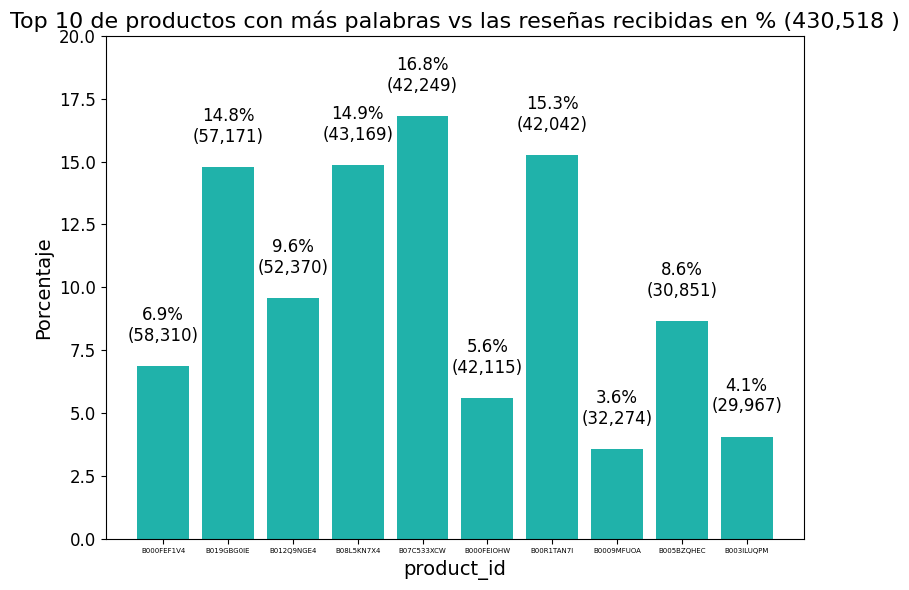

In [24]:
res_grafica=resultado.sort_values(by='Total_palabras', ascending=False).head(10)
res_grafica['Frecuencia Relativa'] = res_grafica['NúmeroDeReseñas'] / res_grafica['NúmeroDeReseñas'].sum()
res_grafica['Porcentaje'] = res_grafica['Frecuencia Relativa'] * 100

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(res_grafica['product_id'], res_grafica['Porcentaje'], color="lightseagreen")

total=res_grafica['Total_palabras'].sum()
total_formato="{:,.0f}".format(total)
total_formato=str(total_formato)

titulo='Top 10 de productos con más palabras vs las reseñas recibidas en % (' + total_formato+ ' )'
# Configurar el gráfico
plt.title(titulo, fontsize=16)
plt.xlabel('product_id', fontsize=14)
plt.ylabel('Porcentaje', fontsize=14)
plt.xticks(fontsize=5)
plt.yticks(fontsize=12)
plt.ylim(0, 20)  # Ajusta los límites del eje Y si es necesario

# Agregar etiquetas en cada barra
for i, val in enumerate(res_grafica['Porcentaje']):
    conteo =  res_grafica['Total_palabras'].iloc[i]
     #f"{int(conteo):,}"
    plt.text(i, val + 1 ,
     f"{val:.1f}%\n({int(conteo):,})"
    , ha='center', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Frecuencia por palabras

In [25]:
#Frecuencia de cada palabra

# Eliminar etiquetas HTML y stopwords
import re
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def eliminar_stop_words(text):
    # Eliminar etiquetas HTML usando expresiones regulares
    text_sin_html = re.sub(r'<br\s*/?>|<p.*?>|</?\w+>', '', text)

    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    palabras = word_tokenize(text_sin_html.lower())  # Tokenizar el texto limpio
    palabras_filtradas = [palabra for palabra in palabras if palabra.isalnum() and palabra.lower() not in stop_words]

    return ' '.join(palabras_filtradas)

merged_df['processed_text'] = merged_df['title_review'].fillna('').astype(str).apply(eliminar_stop_words)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [26]:
merged_df['processed_text'].head()

,processed_text
0,absolutely fabulous never use anything else amazing bought one local shop looked amazon purchased 5 beautiful leather sofa chairs look like new believe
1,leather products used one seems best would recommend product last coat leather really old dried leather would recommend covering neats foot oil first wax product build water resistance last coat want rejuvenate protect recent leather found product better one
2,product works advertised 10 year old bernhart leather chair ottoman room fireplace entire life leather become dry mostly used spray leather conditioners bought 4 bottles cream leather conditioner applied 1 full bottle last month leather looks better still soaking conditioner within 48 hours applied hopefully 4 bottles leather chair back supple condition
3,great stuff works great leather sofa nice soft sheen
4,keeps leather drying leather couch live area air conditioning always tends dry leather leather cleaner gives leather boost dryness also adds nice shine


In [27]:
from collections import Counter

# Tokenizar palabras
all_words = ' '.join(merged_df['processed_text']).split()


word_freq = Counter(all_words)

# Convertir a DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

print(word_freq_df.head(10))

        word  frequency
85     great     197289
149     hair     192865
29   product     164124
170     love     153218
109     good     129746
20      like     129312
3        use     116141
8        one      89827
32    really      73178
27     would      72282


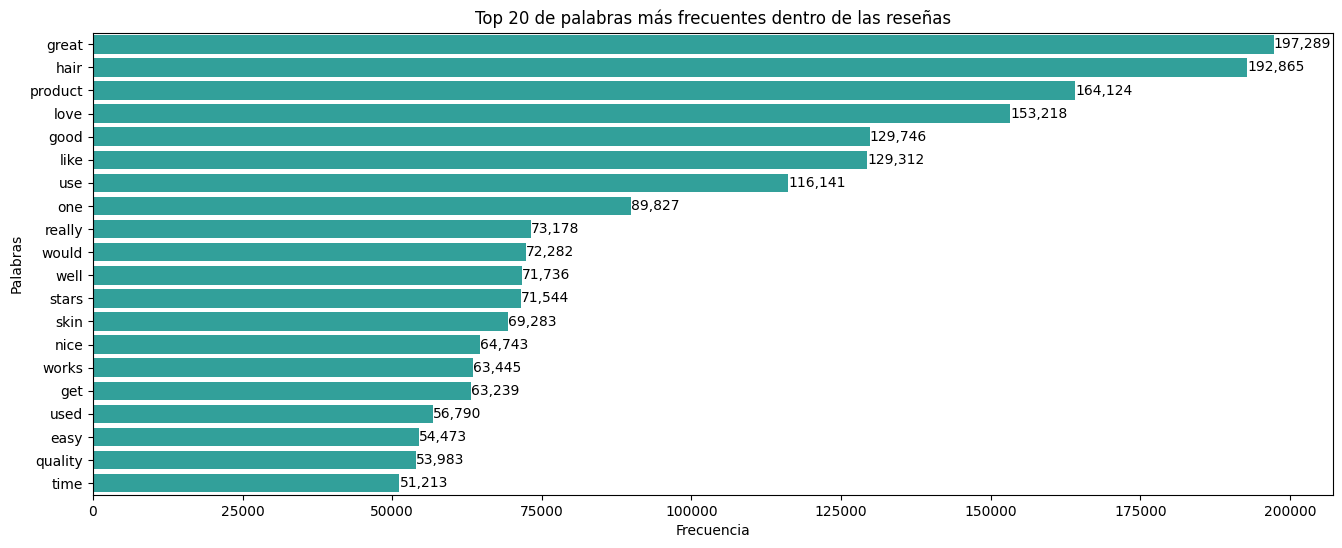

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las 20 palabras más frecuentes
top_words = word_freq_df.head(20)

# Gráfica de barras
plt.figure(figsize=(16, 6))
ax=sns.barplot(data=top_words, x='frequency', y='word', color='lightseagreen')
# Agregar los conteos a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_width()):,}',  # Añadir formato con separación de miles
                (p.get_width() + 0.05, p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=10, color='black')
plt.title('Top 20 de palabras más frecuentes dentro de las reseñas')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.show()

## Signos de puntuación

In [34]:
#Signos de puntuación
# Contar signos de puntuación
merged_df['punctuation_count'] = merged_df['title_review'].apply(lambda x: len(re.findall(r"[^\w\s]|'", x)))
print(merged_df['punctuation_count'].describe())

count    633693.000000
mean          6.467108
std          11.408523
min           0.000000
25%           2.000000
50%           4.000000
75%           8.000000
max        1541.000000
Name: punctuation_count, dtype: float64


In [35]:
import string

# Texto de ejemplo
texto = ' '.join( merged_df['title_review'])

# Obtener los signos de puntuación del texto
signos_puntuacion = [caracter for caracter in texto if caracter in string.punctuation]

# Mostrar los signos de puntuación encontrados en el texto
unique_signos_puntuacion = set(signos_puntuacion)

#Contar cuantas veces aparace cada signo
signos_puntuacion_count = {signo: signos_puntuacion.count(signo) for signo in unique_signos_puntuacion}
signos_puntuacion_count2 = {signo: signos_puntuacion.count(signo) for signo in unique_signos_puntuacion}

#print("Signos de puntuación en el texto:", signos_puntuacion.unique)

In [36]:
unique_signos_puntuacion

df_signos=pd.DataFrame(signos_puntuacion_count.items(), columns=['signos', 'frequency']).sort_values(by='frequency', ascending=False)

#signos_puntuacion_count.sort_values(by='frequency', ascending=False)


In [37]:
df_signos

,signos,frequency
11,.,1684363
17,",",573080
19,!,484451
13,',313037
10,/,168930
0,>,139227
2,<,139019
16,-,92354
18,),48004
20,(,43947


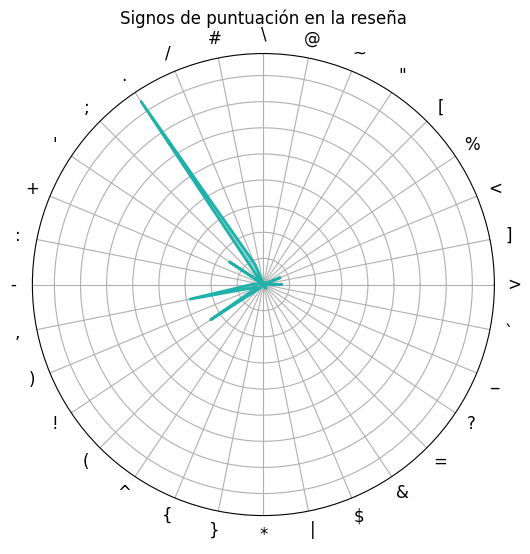

In [48]:
#Gráfico
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import string

# Ejemplo de un diccionario de conteo de signos de puntuación

# Paso 2: Preparar los datos para el gráfico radar
# Extraer los signos y sus frecuencias
signos = list(signos_puntuacion_count2.keys())
frecuencias = list(signos_puntuacion_count2.values())

# Número de categorías (signos)
num_vars = len(signos)

# Asegurarse de que el gráfico sea un círculo completo (cerrar la forma)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Repetir el primer valor para cerrar el círculo
frecuencias += frecuencias[:1]
angles += angles[:1]

# Paso 3: Crear el gráfico radar
fig, ax = plt.subplots(figsize=(6, 6), dpi=100, subplot_kw=dict(polar=True))

# Crear el gráfico
ax.fill(angles, frecuencias, color='lightseagreen', alpha=0.5)
ax.plot(angles, frecuencias, color='lightseagreen', linewidth=2)

# Configurar las etiquetas
ax.set_yticklabels([])  # No mostrar etiquetas en el eje radial
ax.set_xticks(angles[:-1])  # Establecer las ubicaciones de las categorías
ax.set_xticklabels(signos, fontsize=12)

# Agregar los conteos a cada sección del radar
#for i in range(len(signos)):
 #   ax.text(angles[i], frecuencias[i] + 0.5, str(frecuencias[i])+"\n\n",
  #          ha='center', va='center', fontsize=3, color='black')

# Título
ax.set_title('Signos de puntuación en la reseña\n', size=12, color='black')

# Mostrar el gráfico
plt.show()


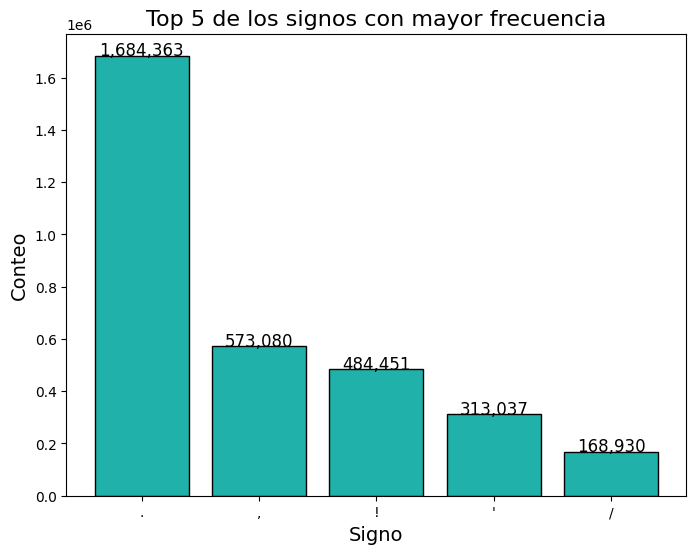

In [43]:
# Crear un gráfico de barras
#Top 6
df_signos_top = df_signos.head(5)

plt.figure(figsize=(8, 6))
plt.bar(df_signos_top['signos'], df_signos_top['frequency'], color='lightseagreen', edgecolor='black')

# Añadir título y etiquetas
plt.title('Top 5 de los signos con mayor frecuencia', fontsize=16)
plt.xlabel('Signo', fontsize=14)
plt.ylabel('Conteo', fontsize=14)

# Mostrar los valores sobre las barras encima
for i, val in enumerate(df_signos_top['frequency']):
     plt.text(i, val + 1 ,f"{int(val):,}", ha='center', fontsize=12)
# Mostrar el gráfico
plt.show()


## Emojis

In [50]:
#Emojis
!pip install emoji
import emoji


# Función para extraer emojis
#def extract_emojis(text):
 #   return ''.join(c for c in text if c in emoji.EMOJI_DATA )

def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA and not c.isdigit())


# Aplicar función
merged_df['emojis'] = merged_df['title_review'].apply(extract_emojis)
print(merged_df['emojis'].head())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.0 MB/s eta 0:00:00
0    
1    
2    
3    
4    
Name: emojis, dtype: object


In [51]:
merged_df[["emojis", "title_review"]].sort_values(by="emojis", ascending=False ).head(10)

,emojis,title_review
622781,🫶💕✨🥰💃🏼👸🏼🎩,"In love with these masks 🫶 Love these masks! 💕 It made my skin so silky and soft, also my skin got that healthy glow ✨. So now I’m using the mask when I go out on a date with my husband 🥰 Who started to pay a lot of compliment to my appearance 💃🏼👸🏼🎩"
359898,🫶🏾😭🫶🏾,Should buy 🫶🏾 Came with everything thing but make sure to buy extra slip solution mines came a bit empty but that ok I’ll buy more. 😭🫶🏾
254841,🫶🏾😍🫶🏾😍,Loved these lashes 🫶🏾😍 will buy again Loved these lashes 🫶🏾😍 will buy again
139253,🫶🏾❤❤❤❤❤,IN LOVE WITH THIS SCENT FOR YEARSSS!!! This lotion will do it every time. I’ve been using it for like 4/5 years and I’m never getting tired of it. Thank you to all the vendors and sources that still sell it after bath and body works discontinued it. I can’t live without it. I’m so elegant and sensual and beautiful and comfortable. The seller wrapped it like so well. It was wrapped in bubble wrapped then packaged 3/4 times and taped up. They’re literally the best. 🫶🏾❤️❤️❤️❤️❤️
498622,🫶🏾,"real fluffy, and versatile ! [[VIDEOID:bc2a6da6a164d4aa43295f0d872f123]] These lashes are real cute and fluffy, only thing is they can get flat or lose there curl a little if not handled right 🫶🏾"
36329,🫶🏽😍❣😍🥰😍💃🏾💃🏾,Love it🫶🏽😍❣️ Just got my sassy wig in the mail love it 😍 an great service super fabulous 🥰😍💃🏾💃🏾
389935,🫶🏽,"It’s alright Honest review : I had to stop using this product because every time I would use it I would get very itchy , so if you have sensitive skin I do not recommend 🫶🏽"
632680,🫶🏽,Thick band! With a little bending it’ll fit with no irritation! The curl is so deep they keep a nice round eye look🫶🏽
72441,🫶🏼,Broadway mango This is my absolute favorite. I don’t always have time to go to the hair store to purchase them. & Amazon having them made it that much better. I usually buy 3 packs for the year 🫶🏼
180989,🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻,Llego en perfectos estado! 🫶🏻 [[VIDEOID:9dc1901b08dd7d168fc18ee5198bdf5e]] Llego muy bien empacado y sellado. 🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻


In [75]:
merged_df[ (merged_df["total_palabras"]>25 ) & ( merged_df["emojis"].apply(len)>0) ].sort_values( by="total_palabras", ascending=True).head(5)

,product_id,prod_description,title_review,rating,user_id,long,total_palabras,processed_text,punctuation_count,emojis
157300,B005QNCIVK,Blackfire High-uv Leather Conditioner 16 Oz.,It was very easy to use and worked very quickly This product worked amazingly well. It was very easy to use and worked very quickly. 👍,5,AHS26MESGWYD36SM4GN73PWMBC4Q,136,26,easy use worked quickly product worked amazingly well easy use worked quickly,3,👍
456661,B07J1QW41Q,"Jojo Siwa Bow for Girls Bundle, 2 Bows - White with Metallic Rainbow Stars and Blue Tie Dye",Convenient I don't know anything about jojosiwa but my granddaughter was extremely excited when she got the bows so it is aces in my book. 💜💜,5,AEJCHHWHLITZQTXM7APEQCYBEKEQ,141,26,convenient know anything jojosiwa granddaughter extremely excited got bows aces book,4,💜💜
20346,B09BNNK3N3,"Adjustable Eyebrow Stamp Shaping Kit,Brow Definer Powder Pomade Stamp Makeup with 10 Reusable Eyebrow Stencils 2 Eyebrow Pen Brushes,Long Lasting Buildable Eyebrow Makeup Tool(brown)",Waste I ordered this in august and just opened it. It’s a waste of money. Nothing going on brow and I can’t even return it. ☹️☹️,1,AGVFXAQGEQB3SGSU6HBR2ZSF7JQQ,128,26,waste ordered august opened waste money nothing going brow even return,9,☹☹
152486,B07RVLFH45,Gel Nail Polish Crystal Summer Sweet Jelly Nail Gel Polish Kit - 8 ML 0.28oz 6 Bottles UV LED Lamp Required Soak Off Gel Polish DIY Nail Art at Home with Storage Box,Yea...not ordering these again 😑 They are very small for the price. The black looks green-ish and the brush is messed up 😑...not ordering again 😑😕,1,AF2YKB6FOISXBH2GPNXQDCNKKIWA,146,26,yea ordering small price black looks brush messed ordering,12,😑😑😑😕
625937,B0B8HHWS5C,Honey Blonde Bundles 27 Bundles Blonde Body Wave Bundles Human Hair 30 30 30 Inch Blonde Body Wave Bundles Weave Unprocessed Virgin Human Hair 3 Bundle For Woman Extension,False hair This is not human hair it’s synthetic hair. I didn’t even get to put it in my head yet. It tangled so baddddd 😒🤦🏽‍♀️.,1,AEG7CTZ523CCQVGCQUYG2IZZTPSA,128,26,false hair human hair synthetic hair even get put head yet tangled baddddd,11,😒🤦🏽♀


## Desinencias

In [76]:
import spacy

# Cargar el modelo en inglés de spaCy
nlp = spacy.load("en_core_web_sm")

# Frase de ejemplo
frase = ' '.join(merged_df['title_review'][157300:157301])

print(frase)
# Procesar la frase en inglés
doc = nlp(frase)

# Inicializar listas para verbos, raíces y desinencias
verbos = []
raices = []
desinencias = []
desinencias_adverb = []
adverb=[]
raices_adverb=[]

# Iterar sobre las palabras en el texto
for token in doc:
    # Verificar si la palabra es un verbo
    if token.pos_ == "VERB":
        verbos.append(token.text)       # Añadir el verbo
        raices.append(token.lemma_)     # Añadir la raíz (lema) del verbo
        desinencias.append(token.text[-2:])  # Tomar las últimas 2 letras (desinencia aproximada)
    #Identifica si la palabra es un adverbio
    if token.pos_=="ADV":
        adverb.append(token.text)
        raices_adverb.append(token.lemma_)
        desinencias_adverb.append(token.text[-2:])  # Tomar las últimas 2 letras (desinencia aproximada)

# Mostrar los verbos, sus raíces y desinencias
print("Verbos encontrados:", verbos)
print("Raíces de los verbos:", raices)
print("Desinencias aproximadas:", desinencias)
print("Adverbios encontrados:", adverb)
print("Raíces de los adverbios:", raices_adverb)
print("Desinencias aproximadas:", desinencias_adverb)

It was very easy to use and worked very quickly This product worked amazingly well.  It was very easy to use and worked very quickly.  👍
Verbos encontrados: ['use', 'worked', 'worked', 'use', 'worked']
Raíces de los verbos: ['use', 'work', 'work', 'use', 'work']
Desinencias aproximadas: ['se', 'ed', 'ed', 'se', 'ed']
Adverbios encontrados: ['very', 'very', 'quickly', 'amazingly', 'well', 'very', 'very', 'quickly']
Raíces de los adverbios: ['very', 'very', 'quickly', 'amazingly', 'well', 'very', 'very', 'quickly']
Desinencias aproximadas: ['ry', 'ry', 'ly', 'ly', 'll', 'ry', 'ry', 'ly']


## N gramas

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

# Unigramas, bigramas y trigramas
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=5)
X = vectorizer.fit_transform(merged_df['title_review'][41501:41505])

# Convertir a DataFrame
ngrams_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(ngrams_df.head())

   not great  thank you  the consistency  thick wound  this product
0          2          0                1            1             2
1          0          1                0            0             1
2          0          0                0            0             0
3          0          0                0            0             0


In [80]:
from nltk import ngrams

frase = ' '.join(merged_df['title_review'][157300:157301])
print(frase)
#frase=df_libro_fil["processed_text"].iloc[1]
print(frase)
n = 2 # un tri
bigramas = ngrams(frase.split(), n)
for gramas in bigramas:
    print (gramas)

It was very easy to use and worked very quickly This product worked amazingly well.  It was very easy to use and worked very quickly.  👍
It was very easy to use and worked very quickly This product worked amazingly well.  It was very easy to use and worked very quickly.  👍
('It', 'was')
('was', 'very')
('very', 'easy')
('easy', 'to')
('to', 'use')
('use', 'and')
('and', 'worked')
('worked', 'very')
('very', 'quickly')
('quickly', 'This')
('This', 'product')
('product', 'worked')
('worked', 'amazingly')
('amazingly', 'well.')
('well.', 'It')
('It', 'was')
('was', 'very')
('very', 'easy')
('easy', 'to')
('to', 'use')
('use', 'and')
('and', 'worked')
('worked', 'very')
('very', 'quickly.')
('quickly.', '👍')


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


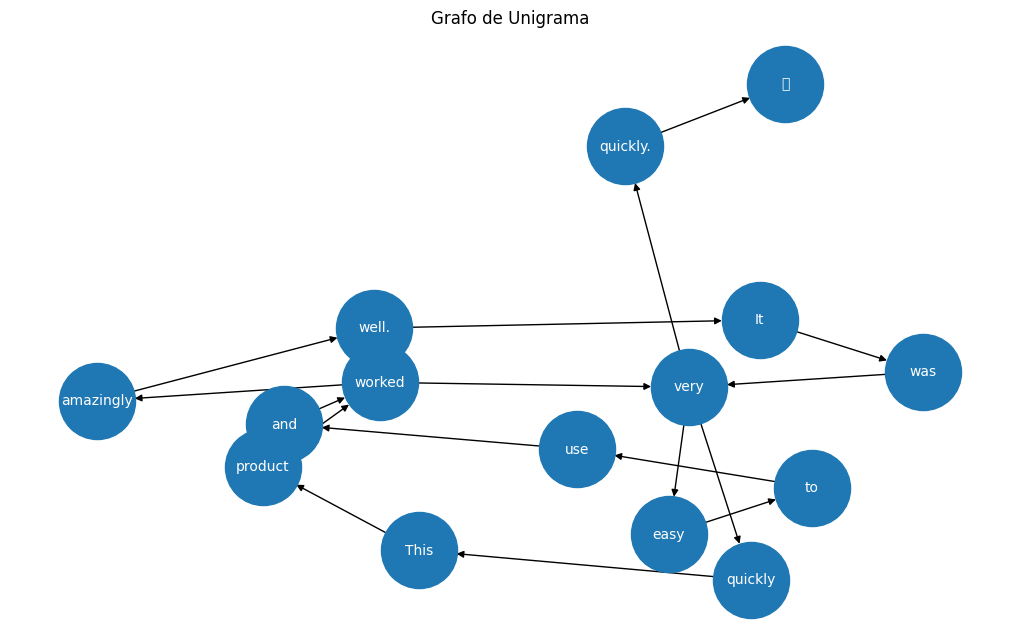

In [81]:
import networkx as nx
n=2
lsita_bigramas = list(ngrams(frase.split(), n))

G = nx.DiGraph()

for gram in lsita_bigramas:
    G.add_edge(gram[0], gram[1])

plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_size=3000, font_size=10, font_color='white')
plt.title("Grafo de Unigrama")
plt.show()

##Nube de palabras


 Generando WordCloud para reseñas positivas...


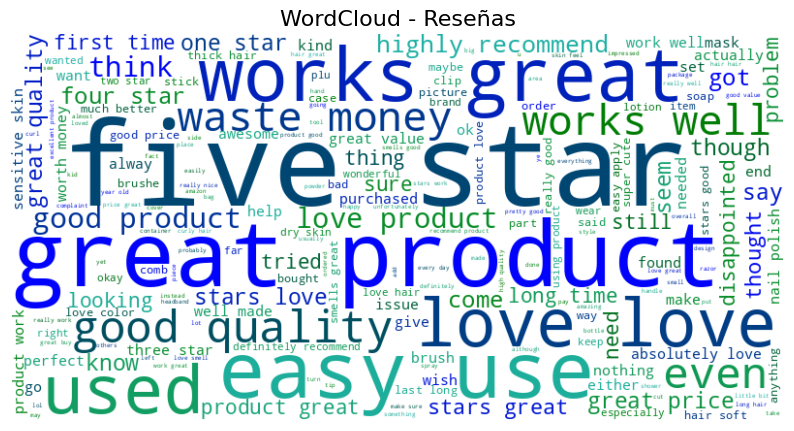

In [83]:
from wordcloud import WordCloud, STOPWORDS

# Define your custom colormap
from matplotlib.colors import LinearSegmentedColormap

colors = ["lightseagreen", "green", "blue"]  # Define your colors here
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Generar un WordCloud para el análisis de sentimientos
def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        width = 800,
        height = 400,
       #  background_color='lightgray',
       background_color = 'white',
        max_words = 200,
       # colormap = 'YlOrBr'
         colormap=cmap
    ).generate(text)
    plt.figure(figsize = (10, 6))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.title(title, fontsize = 16)
    plt.show()

# Crear WordClouds por sentimiento
#reviews = merged_df['processed_text'].str.cat(sep = ' ')
#negative_reviews = df_aumentado[df_aumentado['sentimiento'] == 0]['processed_text'].str.cat(sep = ' ')

print("\n Generando WordCloud para reseñas positivas...")
generate_wordcloud(reviews, "WordCloud - Reseñas")




## Analisis de sentimiento

In [85]:
from textblob import TextBlob


# Crear el objeto TextBlob
blob = TextBlob(frase)

# Análisis de sentimiento (polaridad y subjetividad)
print("Polarity:", blob.sentiment.polarity) #sentimiento pos
print("Subjectivity:", blob.sentiment.subjectivity) #Opiniones personales o emociones.

Polarity: 0.5186666666666667
Subjectivity: 0.8400000000000001
